<a href="https://colab.research.google.com/github/arbarvar/Colab_python_test/blob/main/DEMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: this program uses the Double Exponential Moving Average (DEMA) to determain when to buy or sell stock 

In [36]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [37]:
#load data
from google.colab import files
files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv


{'Google_Stock_Price_Test.csv': b'Date,Open,High,Low,Close,Volume\r\n1/3/2017,778.81,789.63,775.8,786.14,"1,657,300"\r\n1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"\r\n1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"\r\n1/6/2017,795.26,807.9,792.2,806.15,"1,640,200"\r\n1/9/2017,806.4,809.97,802.83,806.65,"1,272,400"\r\n1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"\r\n1/11/2017,805,808.15,801.37,807.91,"1,065,900"\r\n1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"\r\n1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"\r\n1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"\r\n1/18/2017,805.81,806.21,800.99,806.07,"1,294,400"\r\n1/19/2017,805.12,809.48,801.8,802.17,"919,300"\r\n1/20/2017,806.91,806.91,801.69,805.02,"1,670,000"\r\n1/23/2017,807.25,820.87,803.74,819.31,"1,963,600"\r\n1/24/2017,822.3,825.9,817.82,823.87,"1,474,000"\r\n1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"\r\n1/26/2017,837.81,838,827.01,832.15,"2,973,900"\r\n1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"\r

In [38]:
#store the data
df=pd.read_csv('Google_Stock_Price_Test.csv')
#Set date as index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data
df

,Date,Open,High,Low,Close,Volume
2017-01-03,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
2017-01-10,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
2017-01-11,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
2017-01-12,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
2017-01-13,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
2017-01-17,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


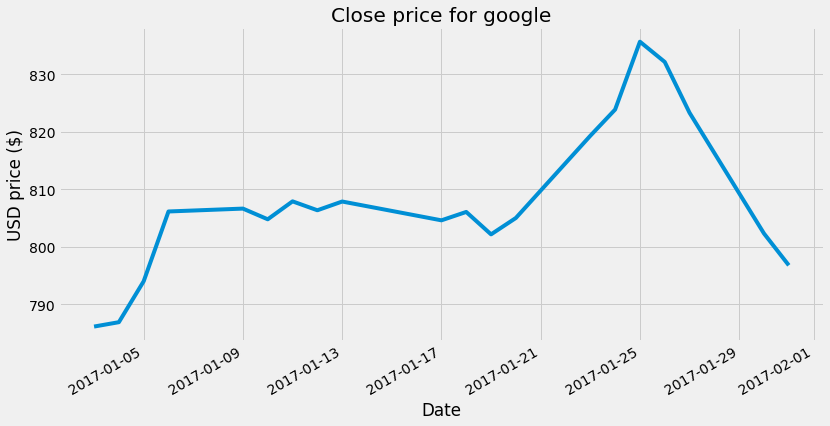

In [39]:
#Visually show the Close data
df['Close'].plot(figsize=(12.2,6.4))
plt.title('Close price for google')
plt.ylabel('USD price ($)')
plt.xlabel('Date')
plt.show()

In [40]:
#Create a function for calculate the Double Exponential Moving Average (DEMA)
def DEMA(data, time_period, column):
  #claculate the Exponential Moving Avreage for some time period
  EMA = data[column].ewm(span=time_period,adjust=False).mean()
  #Calculate the DEMA
  DEMA = 2* EMA - EMA.ewm(span=time_period,adjust=False).mean()

  return DEMA

In [41]:
#Store the short term DEMA (20 day period) and the long term DEMA  (50 dat period) into the data set
df['DEMA_short']=DEMA(df,20,'Close')
df['DEMA_long']=DEMA(df,50,'Close')

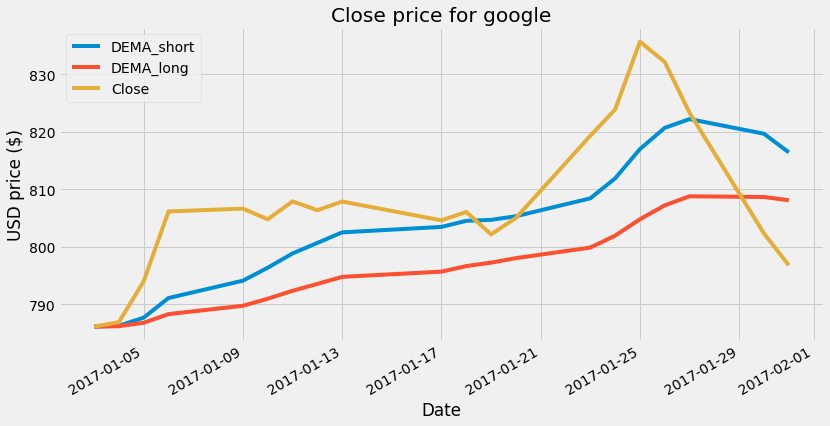

In [42]:
#Plot a chart
#Create a list of column to keep
column_list=['DEMA_short','DEMA_long','Close']

df[column_list].plot(figsize=(12.2,6.4))
plt.title('Close price for google')
plt.ylabel('USD price ($)')
plt.xlabel('Date')
plt.show()

In [59]:
#Create a function to buy and sell the stock (the trading strategy)
def DEMA_strategy(data):
  buy_list=[]
  sell_list=[]
  flag=False
  #Loop through the data
  for i in range(0,len(data)):
    if data['DEMA_short'][i] > data['DEMA_long'][i] and flag==False: #if DEAM short term is above of DEMA long term then it is buy signal
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag=True
    elif data['DEMA_short'][i] < data['DEMA_long'][i] and flag==True: #if DEAM short term is below of DEMA long term then it is sell signal
      buy_list.append(np.nan)
      sell_list.append(data['Close'][i])
      flag=False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  
  #Store the buy and the sell signals/ list into the data set
  data['Buy']=buy_list
  data['Sell']=sell_list

In [60]:
#Run the strategy to get the buy and sell signals
DEMA_strategy(df)

In [61]:
#Visually show the stock but and sell signals
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy'],color='green',label='Buy Signal',marker='^', alpha=1)
plt.scatter(df.index,df['Sell'],color='red',label='Sell Signal',marker='v', alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=.35)
plt.plot(df['DEMA_short'],label='DEMA_short',alpha=.35)
plt.plot(df['DEMA_long'],label='DEMA_long',alpha=.35)
plt.xticks(rotation=45)
plt.title('Close Price buy and sell signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

ConversionError: ignored

<Figure size 878.4x324 with 1 Axes>